# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Import Required Libraries and Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: 

### Importing Required Libraries

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import statistics as st

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


### Loading the data into the Data Frame

In [91]:
df = pd.read_excel(r'C:\Users\Mario\OneDrive\Escritorio\Online Retail.xlsx')

df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Task 2: Data Cleaning

### Checking info for general comprehension of the data.

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Shape for quantity of columns and rows.

In [95]:
df.shape

(541909, 8)

####  Giving the quantity of rows and the info that I got before, I can already see that there are some nulls in Description and CustomerID columns.

### Change data type of columns

In [113]:
df['CustomerID'] = df['CustomerID'].fillna(0).astype('object')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom


### Converting column names into Python list, for manipulation convenience.

In [99]:
df.columns.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

### To be sure about the accuracy of the data, I am removing negative values in Quantity and UnitPrice columns. This does not introduce any bias.

In [101]:
df = df.drop(df.index[df['Quantity'] < 0])
df = df.drop(df.index[df['UnitPrice'] < 0])

### Checking for Null Values

In [103]:
df.isnull().sum()

InvoiceNo        0
StockCode        0
Description    592
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
dtype: int64

### Checkingfor Duplicate Values

In [105]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (5232, 8)


### We already know we have a total of 541909 rows. So now I'm going to drop duplicates, and check again

In [107]:
df = df.drop_duplicates()

In [109]:
df.shape

(526051, 8)

## Task 3: Explore the basic statistics of the dataset.

In [115]:
summary_stats = df.describe()
print(summary_stats)

            Quantity      UnitPrice
count  526051.000000  526051.000000
mean       10.730927       3.913822
std       157.592285      36.053240
min         1.000000       0.000000
25%         1.000000       1.250000
50%         4.000000       2.080000
75%        11.000000       4.130000
max     80995.000000   13541.330000


## Task 7: Identify any outliers or anomalies.

### Detecting Outliers

C:\Users\Mario\AppData\Local\Temp\ipykernel_10188\565683203.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Quantity'], df['UnitPrice']], labels=['Quantity', 'UnitPrice'],vert=False)


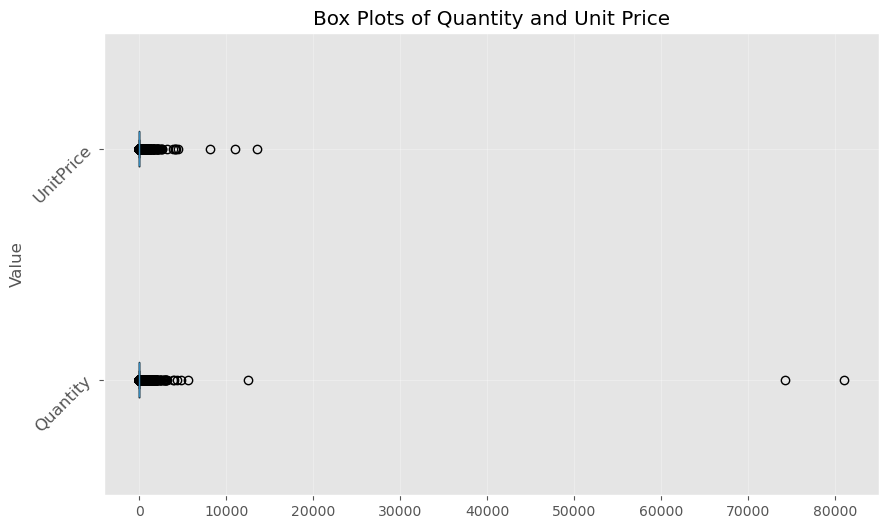

In [605]:
plt.figure(figsize=(10, 6))
plt.boxplot([df['Quantity'], df['UnitPrice']], labels=['Quantity', 'UnitPrice'],vert=False)
plt.title('Box Plots of Quantity and Unit Price')
plt.ylabel('Value')
plt.yticks(fontsize=12, rotation=45)
plt.grid(alpha=0.3)
plt.show()

In [132]:
numeric_df = df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Quantity     10.00
UnitPrice     2.88
dtype: float64


#### Now I am going to find out how many are

In [140]:
# First I calculate Q1, Q3, and IQR for numeric columns only
numeric_df = df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Creating a mask for rows that contain outliers
outlier_mask = False
for col in numeric_df.columns:
    outlier_mask = outlier_mask | (df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col]))

# Count total outliers
num_outliers = outlier_mask.sum()
print(f"Number of rows containing outliers: {num_outliers}")
print(f"Percentage of outliers: {(num_outliers / len(df)) * 100:.2f}%")

# Count outliers per column
outliers_per_column = {}
for col in numeric_df.columns:
    col_outliers = ((df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    outliers_per_column[col] = col_outliers

print("\nOutliers per column:")
for col, count in outliers_per_column.items():
    print(f"{col}: {count} ({(count / len(df)) * 100:.2f}%)")


Number of rows containing outliers: 64871
Percentage of outliers: 12.33%

Outliers per column:
Quantity: 27355 (5.20%)
UnitPrice: 37827 (7.19%)


#### There are some extreme outliers that will interfeer with the correct visualization, so to filter them I can use this:

In [275]:
df_no_outliers = df[~outlier_mask]
print(df_no_outliers.shape)

(461180, 8)


## Task 4: Perform data visualization to gain insights

#### Create histograms to visualize Numerical Distribution

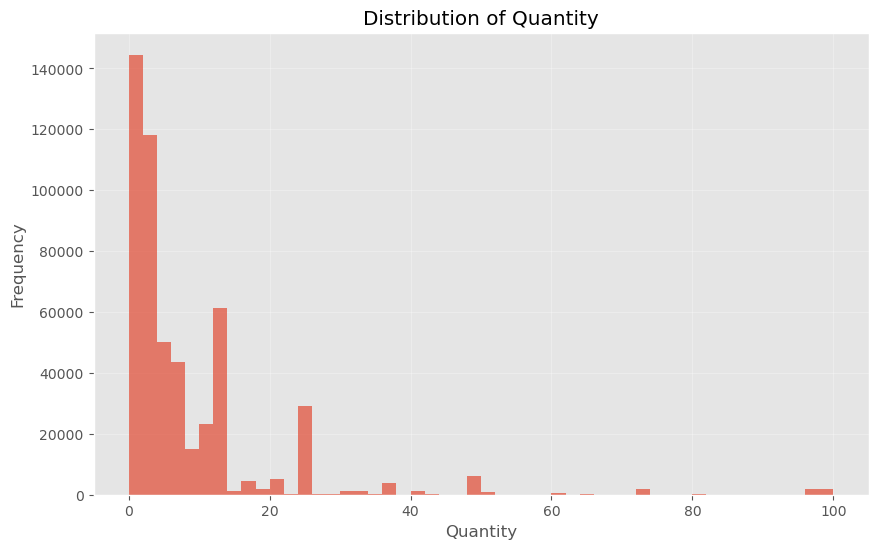

In [329]:
# For Quantity - with log scale and better binning
plt.figure(figsize=(10, 6))
plt.hist(df['Quantity'], bins=50, range=(0, 100), alpha=0.7)  # Focus on values between 0 and 100
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

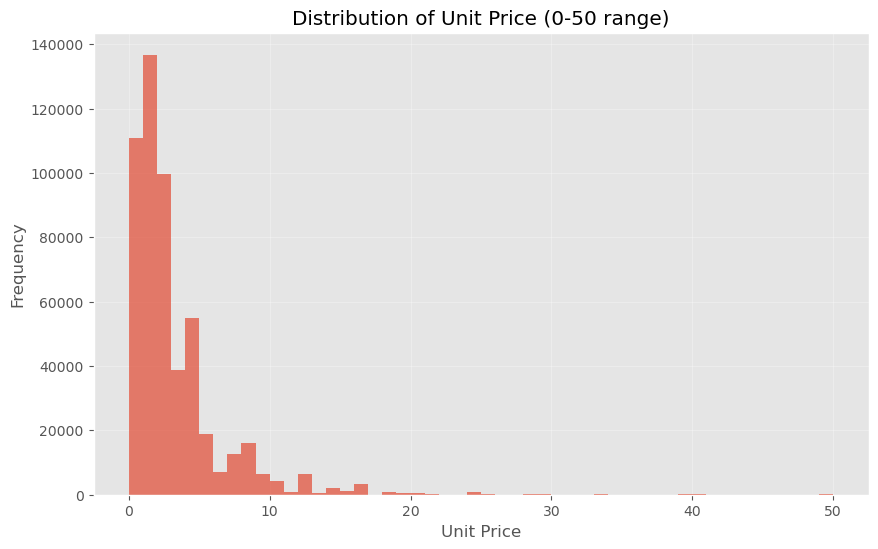

In [331]:
# For Unit Price - with better range
plt.figure(figsize=(10, 6))
plt.hist(df['UnitPrice'], bins=50, range=(0, 50), alpha=0.7)  # Focus on common price range
plt.title('Distribution of Unit Price (0-50 range)')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

#### To see both the main distribution and some outliers, I'll use a logarithmic scale:

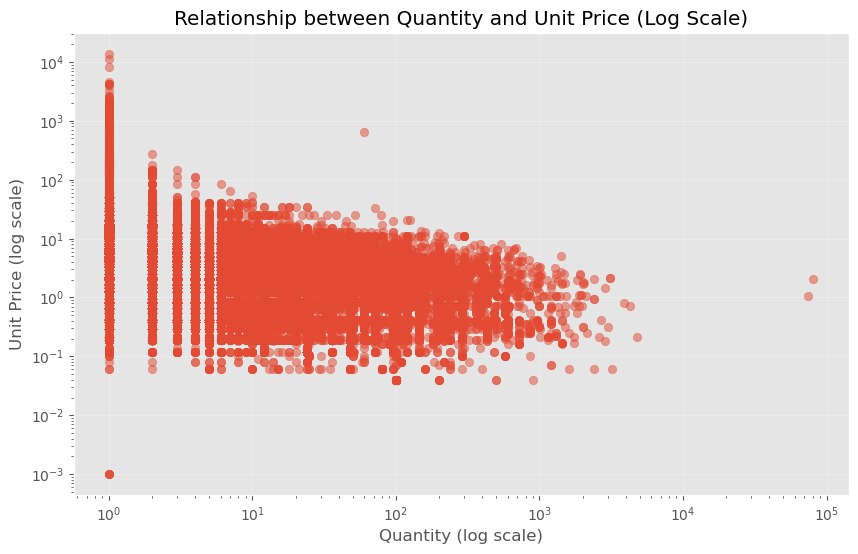

In [303]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['UnitPrice'], alpha=0.5)
plt.xscale('log')  # Logarithmic scale for x-axis
plt.yscale('log')  # Logarithmic scale for y-axis
plt.title('Relationship between Quantity and Unit Price (Log Scale)')
plt.xlabel('Quantity (log scale)')
plt.ylabel('Unit Price (log scale)')
plt.grid(alpha=0.3)
plt.show()

## Task5: Sales trends over time. Identify the busiest months and days of the week in terms of sales.

#### Time series analysis

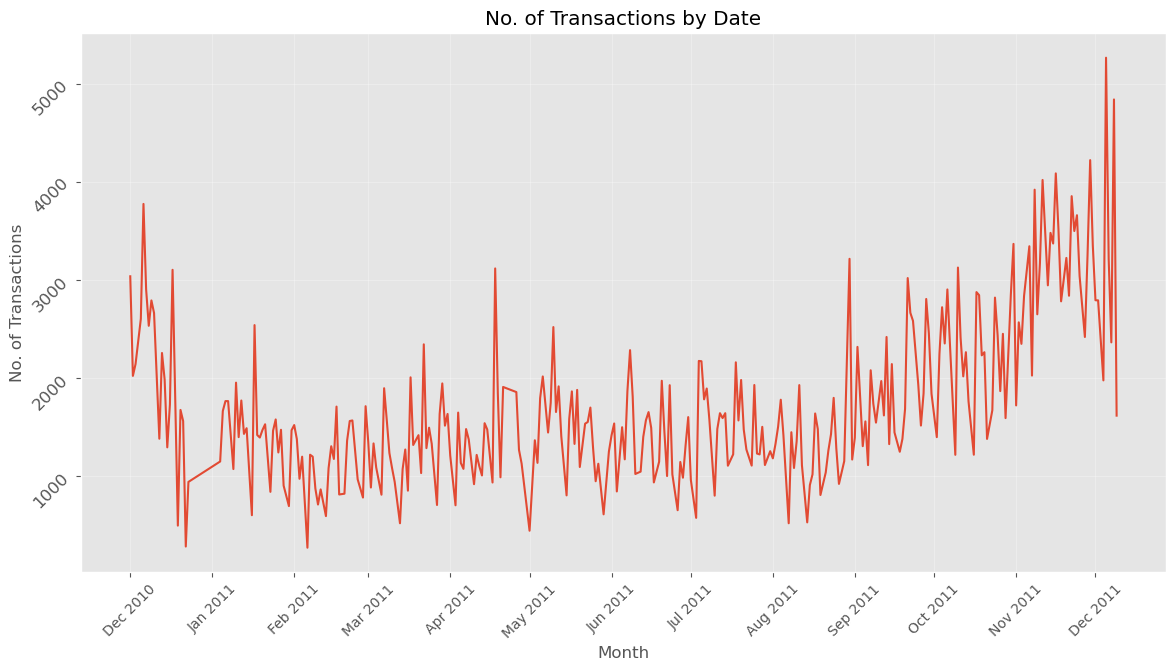

In [617]:
# Plot daily transaction count
df.groupby(df['InvoiceDate'].dt.date).size().plot(figsize=(14, 7))
plt.title('No. of Transactions by Date')
plt.xlabel('Month')
plt.ylabel('No. of Transactions')
plt.grid(alpha=0.3)
plt.yticks(fontsize=12, rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show one label per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as 'Jan 2011', 'Feb 2011', etc.
plt.xticks(rotation=45) 
plt.show()


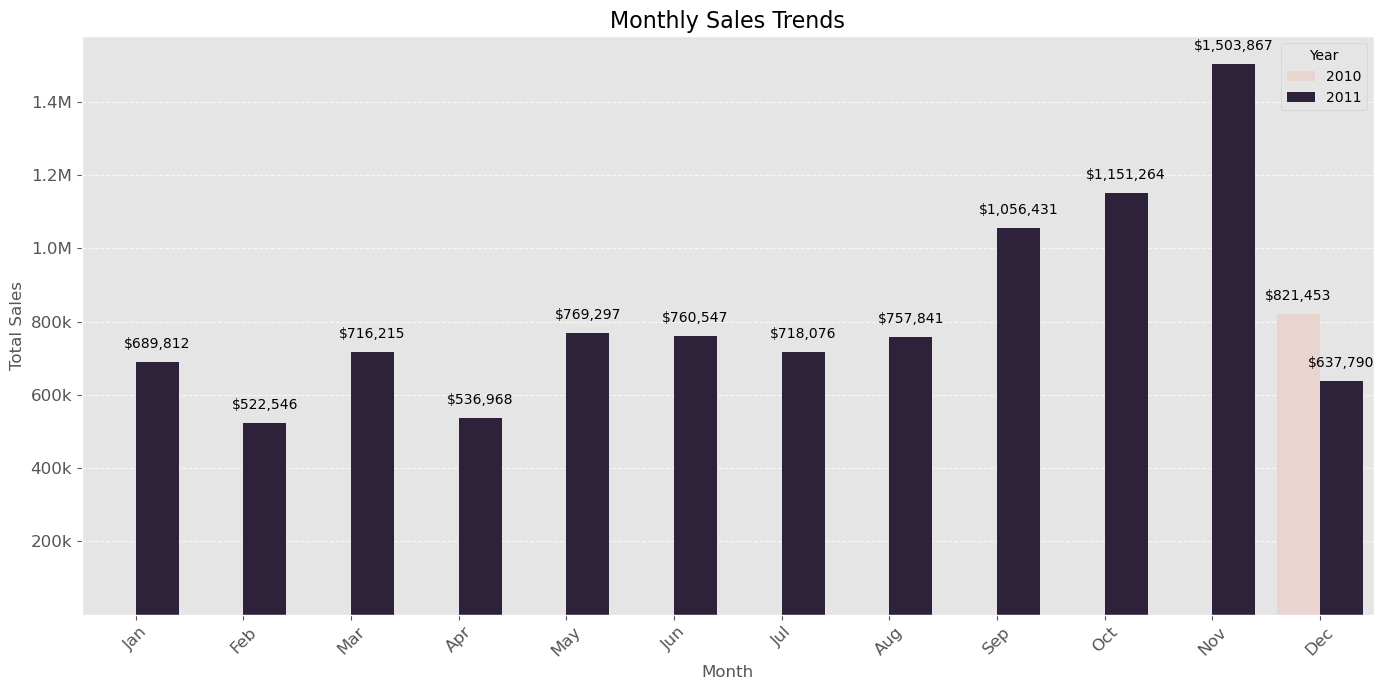

In [633]:
# Monthly Sales Trends BarChart

# First I add total sales column
df['Sales'] = df['Quantity'] * df['UnitPrice']

# Then, I add time-related columns for analysis
df['Month'] = df['InvoiceDate'].dt.month
df['Month_Name'] = df['InvoiceDate'].dt.strftime('%b')
df['Year'] = df['InvoiceDate'].dt.year
df['Day'] = df['InvoiceDate'].dt.day
df['Weekday'] = df['InvoiceDate'].dt.dayofweek
df['Weekday_Name'] = df['InvoiceDate'].dt.strftime('%a')


# Monthly sales trends
monthly_sales = df.groupby(['Year', 'Month', 'Month_Name'])['Sales'].sum().reset_index()
monthly_sales = monthly_sales.sort_values(by=['Year', 'Month'])

# Then I create custom sorting for months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales['Month_Name'] = pd.Categorical(monthly_sales['Month_Name'], categories=month_order, ordered=True)

# Plot monthly sales
yticks = [200000, 400000, 600000, 800000, 1000000, 1200000, 1400000]
ylabels = ['200k', '400k', '600k', '800k', '1.0M', '1.2M','1.4M']
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='Month_Name', y='Sales', hue='Year', data=monthly_sales)
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.yticks(yticks, labels=ylabels)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in ax.patches:  # Get all bars
    height = bar.get_height()
    if height > 0:  # Only annotate bars with non-zero height
        ax.text(
            bar.get_x() + bar.get_width() / 2.,  # Center text
            height + 0.02 * max(monthly_sales['Sales']),  # Offset from the top
            f'${height:,.0f}',
            ha='center',
            va='bottom',
            fontsize=10
        )


plt.tight_layout()
plt.show()


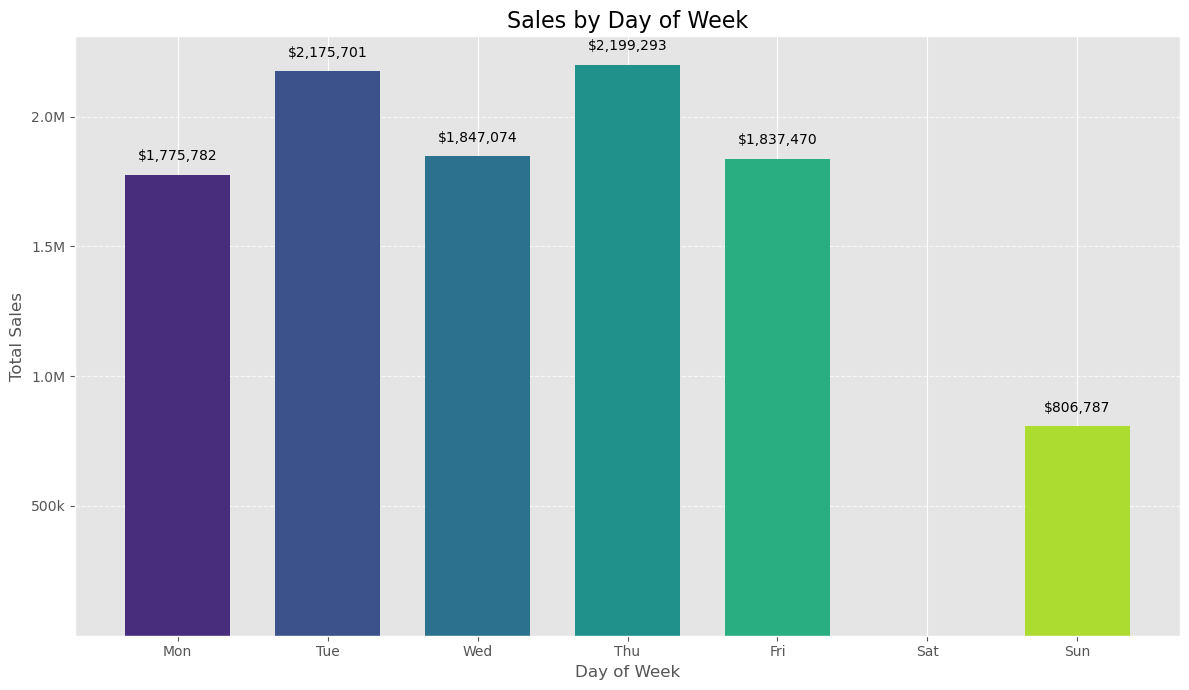

In [481]:
# Create custom sorting for weekdays

weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_sales['Weekday_Name'] = pd.Categorical(weekday_sales['Weekday_Name'], categories=weekday_order, ordered=True)
weekday_sales = weekday_sales.sort_values('Weekday_Name')

# Plot sales by day of week

yticks = [500000, 1000000, 1500000, 2000000]
ylabels = ['500k', '1.0M', '1.5M', '2.0M']
plt.figure(figsize=(12, 7))

ax = plt.bar(
    x=weekday_sales['Weekday_Name'],
    height=weekday_sales['Sales'],
    width=0.7,  # Wider bars (0.8 is about the maximum before they touch)
    color=sns.color_palette('viridis', 7)  # Keep the nice color palette
)

plt.title('Sales by Day of Week', fontsize=16)
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(yticks, labels=ylabels)
plt.yticks(fontsize=10)


# Add sales values on top of each bar
for bar in ax:
    height = bar.get_height()
    if height > 0:  # Only annotate bars with non-zero height
        plt.text(
            bar.get_x() + bar.get_width() / 2.,
            height + 0.02 * max(weekday_sales['Sales']),  # Slight offset from top
            f'${height:,.0f}',
            ha='center',
            va='bottom',
            fontsize=10
        )


plt.tight_layout()
plt.show()

In [ ]:
## Task 6: Top-selling products and countries based on the quantity sold.

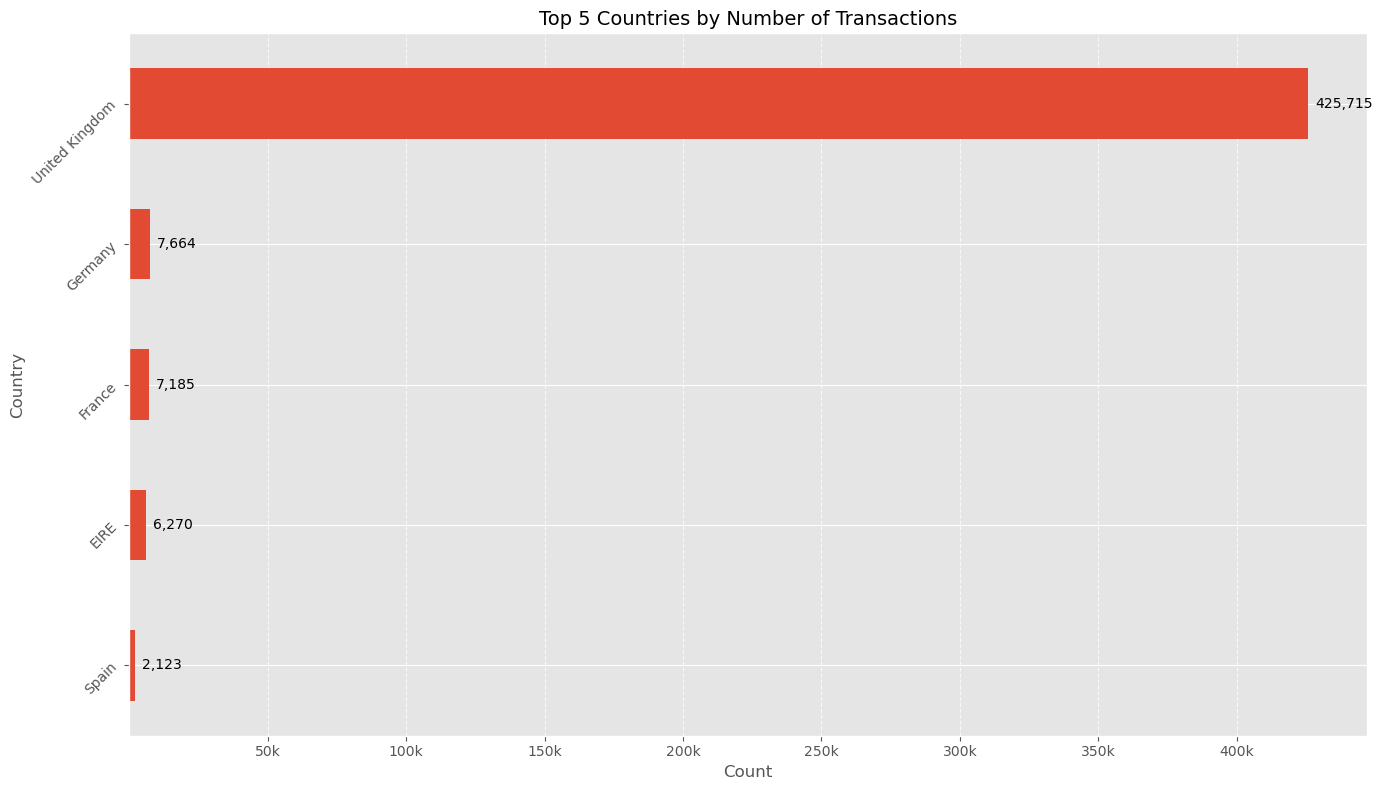

In [727]:
# Get the top 5 countries by transaction count
top_countries = df_no_outliers['Country'].value_counts().head(5).sort_values(ascending=True)

yticks = [50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000]
ylabels = ['50k', '100k', '150k', '200k', '250k', '300k', '350k', '400k']

plt.figure(figsize=(14, 8))  # Adjusted figure size for better fit with horizontal bars

ax = top_countries.plot(kind='barh')  # 'barh' for horizontal bars
plt.title('Top 5 Countries by Number of Transactions', fontsize=14)
plt.xlabel('Count') 
plt.ylabel('Country') 
plt.yticks(fontsize=10, rotation=45)
plt.xticks(fontsize=10)
plt.xticks(yticks, labels=ylabels) 

# Add quantity values next to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                fontsize=10,
                xytext=(5, 0), 
                textcoords='offset points')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

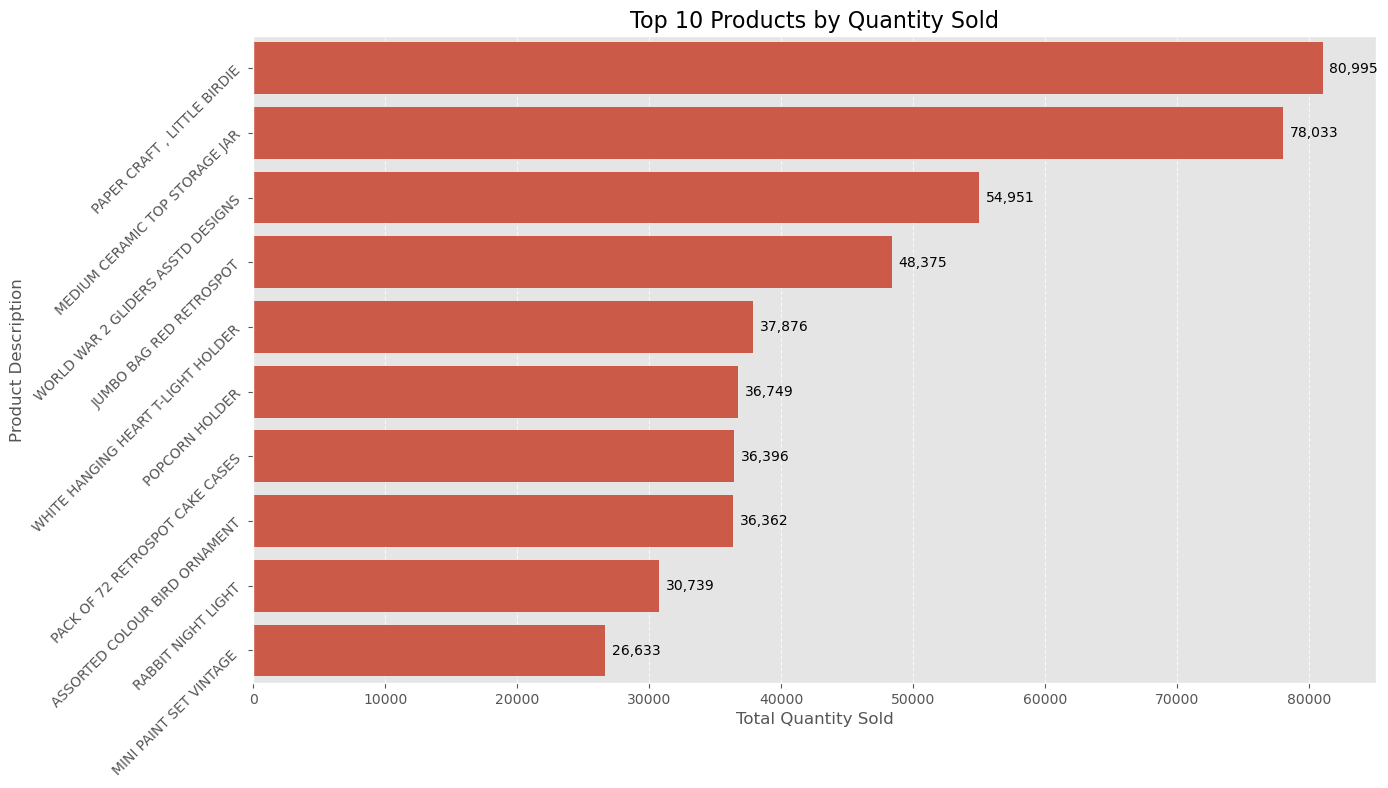

In [639]:
# Top-selling products by quantity
top_products_qty = df.groupby('Description')['Quantity'].sum().reset_index()
top_products_qty = top_products_qty.sort_values(by='Quantity', ascending=False).head(10)

# Plot top products by quantity
plt.figure(figsize=(14, 8))
ax = sns.barplot(y='Description', x='Quantity', data=top_products_qty)
plt.title('Top 10 Products by Quantity Sold', fontsize=16)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.yticks(fontsize=10, rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add quantity values next to each bar
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_width():,.0f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha = 'left', va = 'center',
                fontsize=10,
                xytext=(5, 0), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

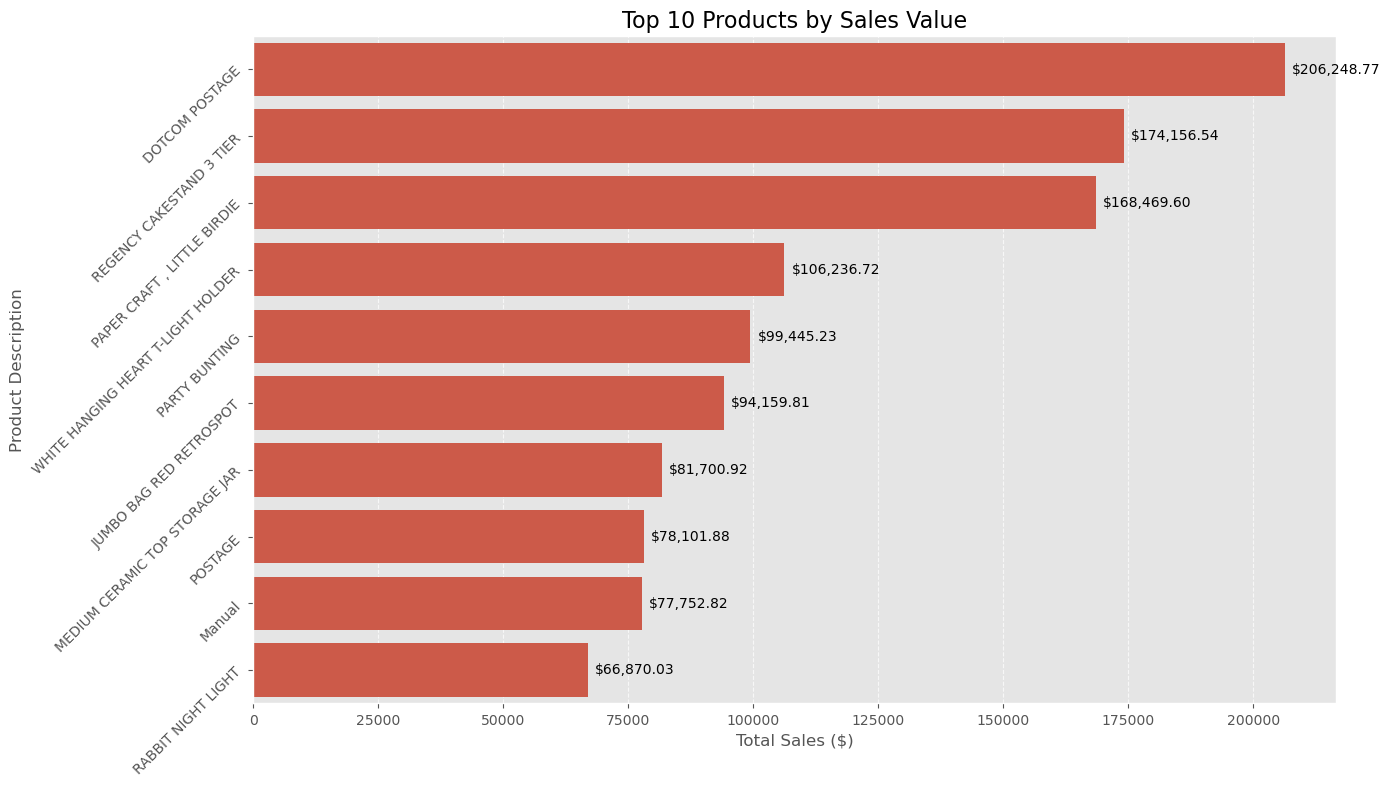

In [643]:
# Top-selling products by sales value
top_products_sales = df.groupby('Description')['Sales'].sum().reset_index()
top_products_sales = top_products_sales.sort_values(by='Sales', ascending=False).head(10)

plt.figure(figsize=(14, 8))
ax = sns.barplot(y='Description', x='Sales', data=top_products_sales)
plt.title('Top 10 Products by Sales Value', fontsize=16)
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Description')
plt.yticks(fontsize=10, rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add sales values next to each bar
for i, p in enumerate(ax.patches):
    ax.annotate(f'${p.get_width():,.2f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha = 'left', va = 'center',
                fontsize=10,
                xytext=(5, 0), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

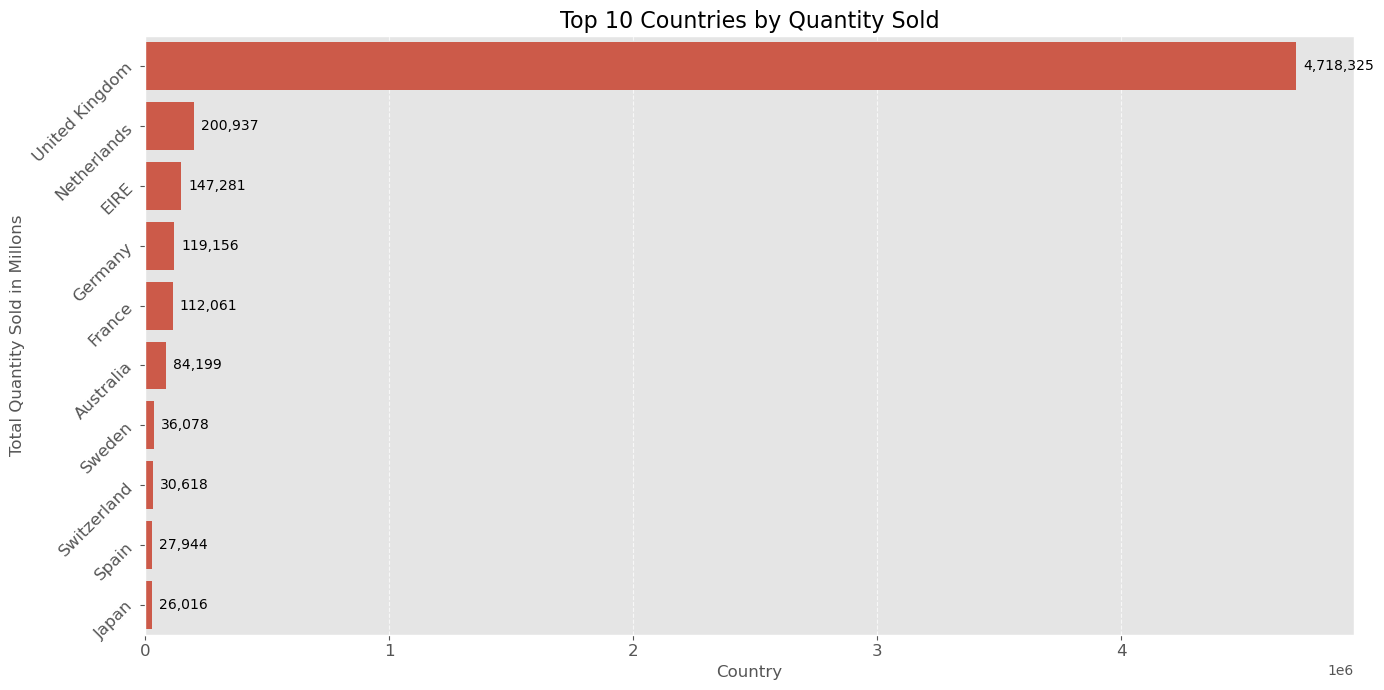

In [669]:
# Top countries by quantity sold
top_countries_qty = df.groupby('Country')['Quantity'].sum().reset_index()
top_countries_qty = top_countries_qty.sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize=(14, 7))
ax = sns.barplot(y='Country', x='Quantity', data=top_countries_qty)
plt.title('Top 10 Countries by Quantity Sold', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold in Millons')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)


# Add quantity values on top of each bar
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_width():,.0f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha = 'left', va = 'center',
                fontsize=10,
                xytext=(5, 0), 
                textcoords='offset points')


plt.tight_layout()
plt.show()

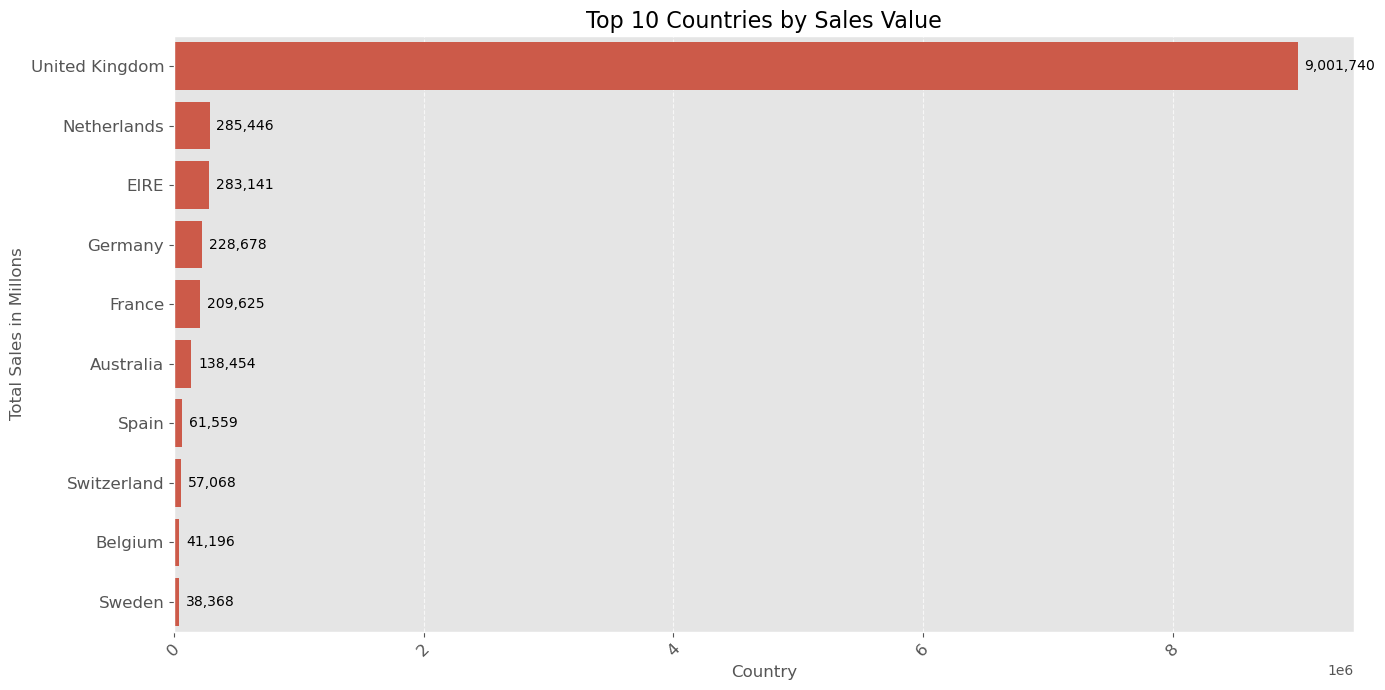

In [673]:
# Top countries by sales value
top_countries_sales = df.groupby('Country')['Sales'].sum().reset_index()
top_countries_sales = top_countries_sales.sort_values(by='Sales', ascending=False).head(10)

plt.figure(figsize=(14, 7))
ax = sns.barplot(y='Country', x='Sales', data=top_countries_sales)
plt.title('Top 10 Countries by Sales Value', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Total Sales in Millons')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add quantity values on top of each bar
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_width():,.0f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha = 'left', va = 'center',
                fontsize=10,
                xytext=(5, 0), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
#### Customer Segmentation

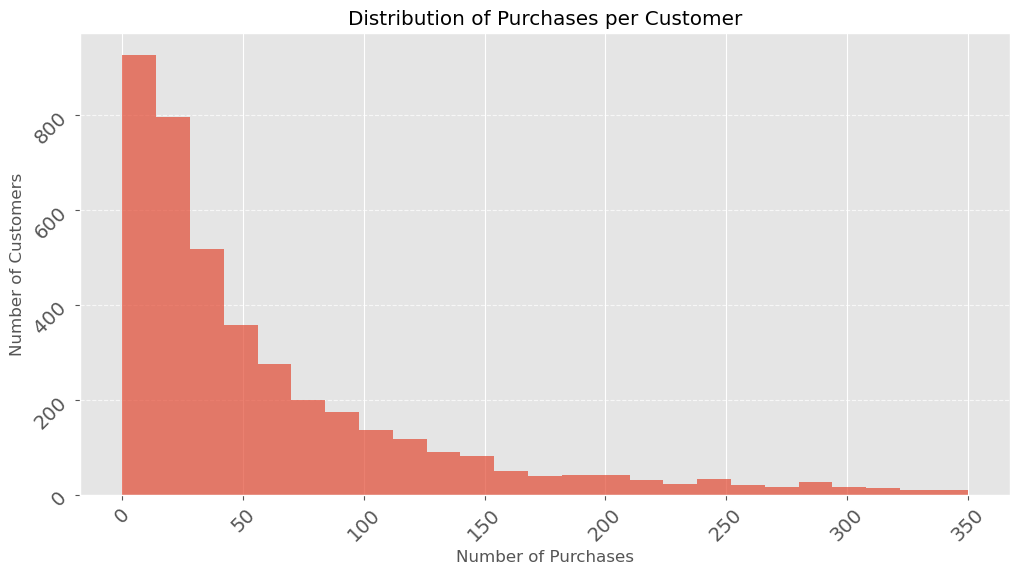

In [595]:
# Customer purchase frequency
customer_freq = df_no_outliers.groupby('CustomerID').size().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.hist(customer_freq, bins=25, range=(0, 350), alpha=0.7)
plt.title('Distribution of Purchases per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(rotation=45, fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [503]:
#### For my next heatmap I will filter out Saturday, because it has no sales. So first I check the order:
for day in weekday_order:
    if day not in sales_pivot.columns:
        sales_pivot[day] = 0  # Fill missing days with 0 sales

sales_pivot = sales_pivot[weekday_order]  # Now reorder


Available weekdays: ['Fri', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed']
Expected weekdays: ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


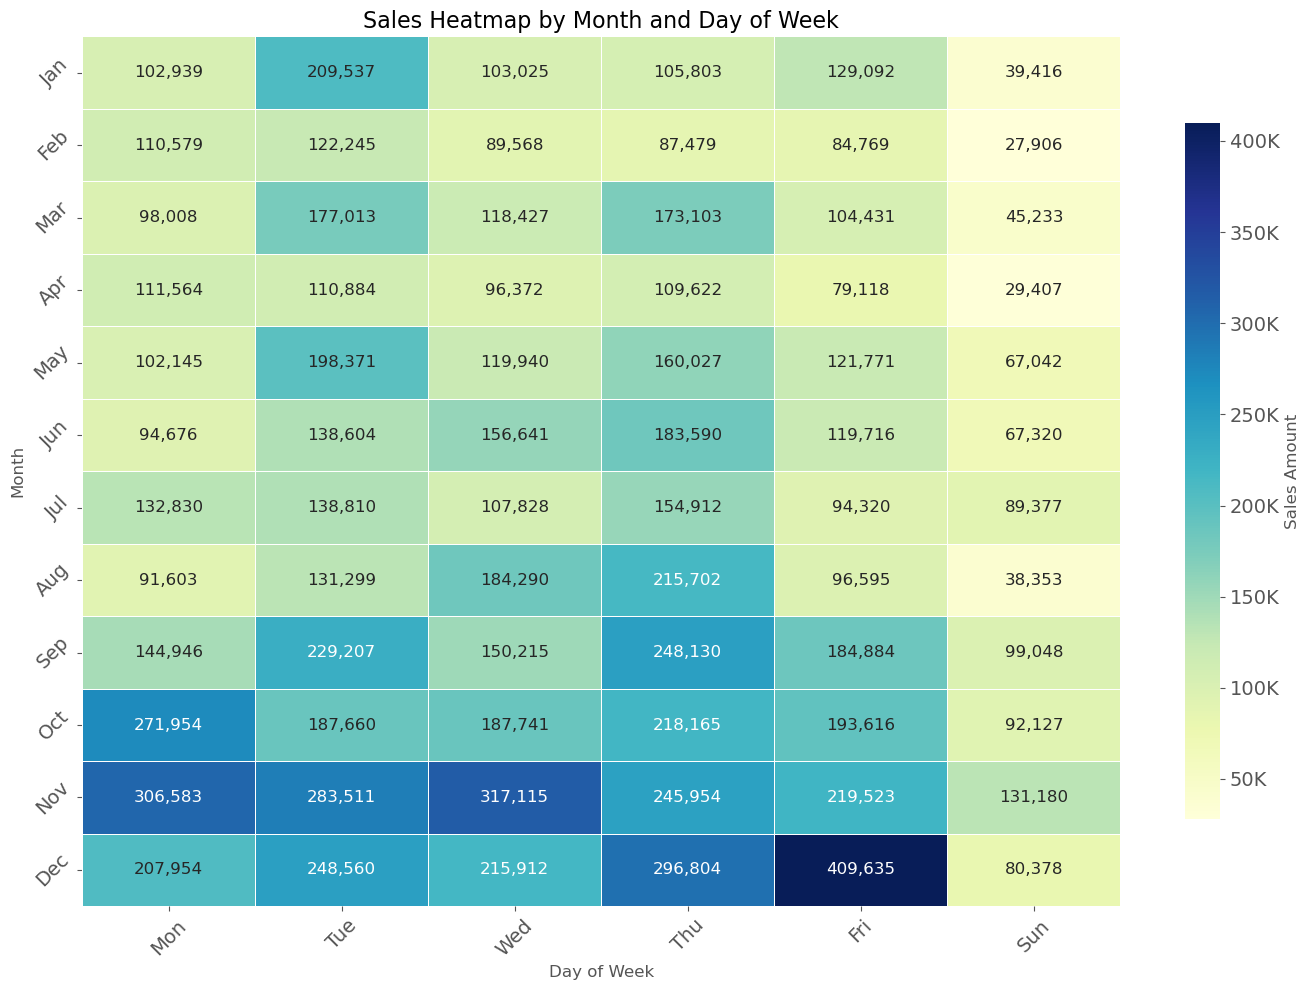


🔍 TOP SALES DAY-MONTH COMBINATIONS:
  • Dec Fri: $409,635.24
  • Nov Wed: $317,115.15
  • Nov Mon: $306,583.03
  • Dec Thu: $296,803.84
  • Nov Tue: $283,511.03


In [541]:
#COMBINED HEATMAP OF SALES PATTERNS

# Create month-weekday heatmap to identify specific high-sales days
sales_heatmap = df.groupby(['Month_Name', 'Weekday_Name'])['Sales'].sum().reset_index()
sales_pivot = sales_heatmap.pivot(index='Month_Name', columns='Weekday_Name', values='Sales')

# Reorder months and weekdays
sales_pivot = sales_pivot.reindex(month_order)

# Here I filter out 'Sat' from the weekday_order list so it does not appear in the heatmap.
filtered_weekday_order = [day for day in weekday_order if day != 'Sat']

# Reorder the DataFrame without 'Sat'
sales_pivot = sales_pivot[filtered_weekday_order]

# Plot the heatmap and capture the returned Axes
plt.figure(figsize=(14, 10))
ax = sns.heatmap(sales_pivot, annot=True, fmt=',.0f', cmap='YlGnBu', linewidths=.5,
                 cbar_kws={'shrink': 0.8, 'format': '%.0f', 'label': 'Sales Amount'},
                 annot_kws={'size': 12})  # Adjust annotation size

# Modify the existing color bar
cbar = ax.collections[0].colorbar  # Get the color bar from heatmap
cbar.ax.tick_params(labelsize=14)  # Increase font size
cbar.set_ticks([50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000])  # Custom tick values
cbar.set_ticklabels(['50K', '100K', '150K', '200K', '250K', '300K', '350K', '400K'])  # Custom labels

plt.title('Sales Heatmap by Month and Day of Week', fontsize=16)
plt.xlabel('Day of Week')
plt.ylabel('Month')

plt.xticks(rotation=45, fontsize=14)
plt.yticks(rotation=45, fontsize=14)
plt.tight_layout()
plt.show()

# Identify the top sales day-month combinations
print("\n🔍 TOP SALES DAY-MONTH COMBINATIONS:")
sales_heatmap['Month_Weekday'] = sales_heatmap['Month_Name'] + '-' + sales_heatmap['Weekday_Name']
top_combinations = sales_heatmap.sort_values(by='Sales', ascending=False).head(5)
for i, row in top_combinations.iterrows():
    print(f"  • {row['Month_Name']} {row['Weekday_Name']}: ${row['Sales']:,.2f}")

## Task 8: Conclusions and Summary.

1. **Purchase Quantity Distribution**:
   - Most orders involve small quantities (1-10 items), with the highest frequency at very low quantities
   - There are several distinct peaks at specific quantities (10, 12, 24, 36), suggesting popular bundle sizes or standard ordering quantities

2. **Quantity vs Price Relationship**:
   - Clear negative correlation between quantity and unit price (log scale)
   - Bulk purchases generally come with lower unit prices
   - Wide price variability for single-item purchases (from <£0.10 to >£1,000)
   - Some outliers exist with both high quantity and high price

3. **Seasonal Sales Patterns**:
   - Strong year-end sales spike with November (£1.5M) and December (£1.15M) significantly outperforming other months
   - Weakest sales in February (£522K) and April (£536K)
   - Q4 performance far exceeds other quarters, indicating strong holiday season impact

4. **Weekly Sales Patterns**:
   - Weekdays outperform weekends significantly
   - Thursday (£2.2M) and Tuesday (£2.17M) are the highest-performing days
   - Sunday shows dramatically lower sales (£806K), less than half of top weekdays
   - Friday (£1.84M) and Wednesday (£1.85M) have similar mid-level performance

5. **Product Performance**:
   - "Paper Craft Little Birdie" (80,995 units) and "Storage Jar" (78,033 units) are the top-selling products by quantity
   - Clear leader products with the top two items significantly outperforming others
   - Most top 10 products are home décor or gift items

6. **Geographic Sales Distribution**:
   - United Kingdom dominates with £9M in sales, nearly 30x higher than the second market
   - Netherlands (£285K), Ireland (£283K), and Germany (£228K) form a secondary tier
   - The business appears to be UK-based with some expansion into nearby European markets

7. **Customer Purchase Behavior**:
   - Most customers make fewer than 50 purchases
   - Long-tail distribution with a small number of very active customers making 200+ purchases
   - The majority of customers are occasional rather than frequent buyers

8. **Seasonal and Day-of-Week Patterns** (Heatmap):
   - Friday in December shows highest single day-month combination (£409K)
   - November has consistently high performance across all weekdays
   - Sundays consistently underperform across all months
   - Q4 (Oct-Dec) shows darker colors across most days, confirming seasonal strength

### Executive Summary

This online retail business exhibits classic e-commerce patterns with strong seasonality and day-of-week effects. It's heavily concentrated in the UK market with modest international presence, focusing primarily on home décor and gift items. The business experiences a typical holiday season spike with very strong November-December sales.
The customer base consists primarily of occasional buyers making small-quantity purchases, though there is a valuable segment of high-frequency customers. The pricing structure shows expected quantity discounts, and purchasing patterns suggest both individual consumers and possibly some business-to-business activity given the peaks at standard bundle quantities.
Key opportunities likely include reducing the Sunday sales gap, expanding European market penetration beyond the UK, and developing strategies to convert more occasional buyers into repeat customers.